# QAOA Max-Cut Exercise: 2-Node Graph

## Introduction and Problem Description

### What is Max-Cut?

The **Max-Cut problem** is a well-known challenge in computer science and optimisation. Given a graph (a collection of nodes connected by edges), the goal is to divide the nodes into two groups in a way that **maximises the number of edges that run between the two groups**.

In simpler terms:
- You’re trying to “cut” the graph by placing nodes into two separate sets.
- Each edge that connects a node in one set to a node in the other is considered **cut**.
- The more edges you cut, the better your solution.

### Example: 2-Node Graph

Let’s take the simplest possible case — a graph with **2 nodes** connected by **1 edge**.

- There are only two ways to split these nodes:
  1. Both nodes in the same group → **no edge is cut**
  2. Nodes in different groups → **1 edge is cut**

To **maximize the number of cut edges**, we should place each node in a different group. So the optimal solution cuts the single edge — and that's the **maximum cut** for this graph.


---

### What is QAOA?

QAOA stands for **Quantum Approximate Optimisation Algorithm**. It is a hybrid quantum-classical algorithm designed to find approximate solutions to optimisation problems like Max-Cut.

- QAOA prepares a quantum state that represents a superposition of all possible solutions.
- It applies operators based on the problem structure (cost unitary) and mixing operators to explore solution space.
- After measurement, the outcome with the highest probability corresponds to a good approximate solution.

---

### How does this circuit work?

1. **Initialisation (Hadamard gates):**  
   Each qubit is put into a superposition state, representing all possible ways to assign nodes to groups simultaneously.

2. **Cost Unitary (RZZ gate):**  
   This encodes the problem’s cost function (how good a cut is) by applying phases to the quantum states based on the edges in the graph.

3. **Mixing Unitary (RX rotations):**  
   These rotations allow the algorithm to explore different cuts by mixing the amplitudes of the quantum states.

4. **Measurement:**  
   Measuring the qubits collapses the quantum state to a classical bitstring, representing one possible cut.

---

### Parameters $\gamma$ and $\beta$

- The angles $\gamma$ and $\beta$ control the strength of the cost and mixing operations.
- Optimising these angles is key to improving the quality of solutions, but in this exercise, we will use fixed values for simplicity.
- QAOA is sensitive to these parameters and usually requires optimisation (classical outer loop) to find the best angles. Since this example uses fixed angles, perfect separation isn’t guaranteed.

---

### What do the results mean?

The output is a histogram showing how many times each possible solution was measured.  
- Bitstrings where the two bits differ (e.g., "01" or "10") represent the maximum cut (nodes in different groups).
- You should see these bitstrings appear more often than others, indicating the algorithm favors the best solutions.



# Exercise problem

You want to solve the Max-Cut problem on a simple graph with 2 nodes connected by 1 edge using QAOA with 1 layer (p=1).

The Max-Cut problem aims to divide the nodes into two groups to maximize the number of edges between groups. For 2 nodes connected by an edge, the best cut separates the two nodes.

---

## Step 1: Setup and Initialisation

- Create a 2-qubit quantum circuit with 2 classical bits for measurement.
- Apply Hadamard gates to create superposition on both qubits.

---

## Step 2: Apply the Cost Unitary

This step encodes the structure of the problem (the graph and its edges) into the quantum state.

- For Max-Cut, the cost function rewards placing connected nodes in different groups.
- This is implemented using an **RZZ gate**, which applies a rotation based on the parity of two qubits (i.e., whether their values are the same or different).
- You apply an `RZZ(2γ)` gate between each pair of connected qubits. For this 2-node graph, there's only one edge — between qubit 0 and qubit 1.

--> The `RZZ` gate introduces a phase that favors the cut (01 and 10) over no-cut (00 and 11), depending on the choice of γ.

**Note: Since `RZZ` is not a standard basis gate, Qiskit does not provide a direct `qc.rzz(...)` method. You’ll need to figure out a way to import it and add it to your circuit. Internally, this custom gate will be decomposed into basic gates like `CX` and `RZ` during transpilation, so it remains compatible with real quantum hardware. You can also build `RZZ` yourself with standard gates in a function.**

---

## Step 3: Apply the Mixing Unitary

This step allows the quantum state to explore different bitstring combinations by mixing the amplitudes.

- You apply an `RX(2β)` rotation to each qubit.
- These gates rotate the qubits around the X-axis of the Bloch sphere, changing their state from one basis state to another.
- This helps avoid getting stuck in a local minimum and allows the algorithm to explore and interfere between possible solutions.

--> Think of the `RX` gates as “shuffling” the solutions after the cost function has biased them.


## Step 4: Measurement and Simulation

- Measure both qubits.
- Simulate the circuit and plot the measurement histogram.

---

## Given parameters:

$
\gamma = -\frac{\pi}{4}, \quad \beta = \frac{\pi}{8}
$

---

## Your tasks:  
- Complete steps 2–4 by filling in the missing code.
- Given the current parameter choices, the quantum circuit is expected to assign higher probabilities to the Max-Cut solutions "01" and "10", which represent the nodes being placed on opposite sides of the cut (i.e., separated). Try playing around with the parameters to see how the results can change.


In [ ]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit_aer --quiet

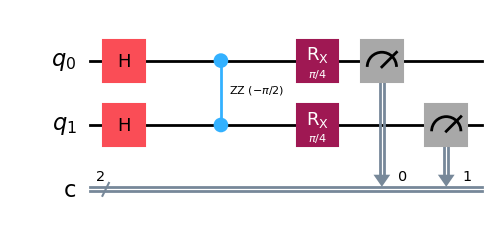

In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

# Step 1: Setup and Initialization
qc = QuantumCircuit(2, 2)
qc.h([0, 1])  # Apply Hadamards

# Parameters
gamma = -np.pi / 4
beta = np.pi / 8

# Step 2: Apply the Cost Unitary
# YOUR CODE HERE
# Solution:
from qiskit.circuit.library import RZZGate

# or alternatively:
# def RZZGate(theta):
#     rzz_circuit = QuantumCircuit(2)
#     rzz_circuit.cx(0, 1)
#     rzz_circuit.rz(theta, 1)
#     rzz_circuit.cx(0, 1)
#     return rzz_circuit.to_gate(label=f"RZZ({theta:.2f})")

qc.append(RZZGate(2 * gamma), [0, 1])
#qc = qc.decompose() # Useful if you build your own gate function or examine the RZZ gate structure


# Step 3: Apply the Mixing Unitary
# YOUR CODE HERE
# Solution:
qc.rx(2 * beta, 0)
qc.rx(2 * beta, 1)

# Step 4: Measurement and Simulation
# YOUR CODE HERE
# Solution:
qc.measure([0, 1], [0, 1])

qc.draw('mpl')

QAOA Max-Cut results:
{'01': 515, '10': 509}


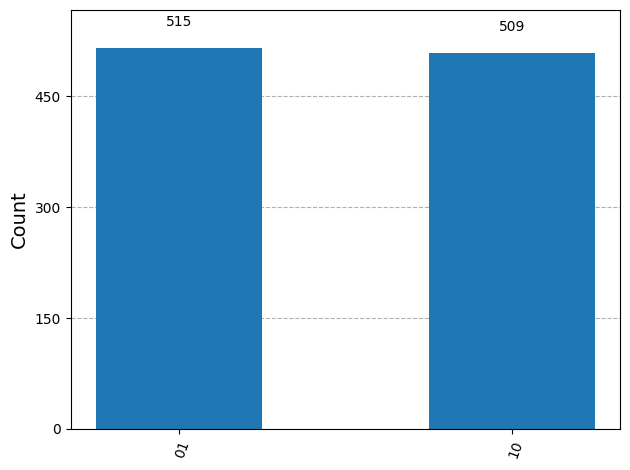

In [19]:
# Measurement
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("QAOA Max-Cut results:")
print(counts)
plot_histogram(counts)